<h1>Michael Ly's HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


For the knight to cross safely, the knight must avoid any events that involve a troll (T).<br>
Only event 3 (E3) has no trolls and is safe, so the knight should pray for E3.

<b>The chance of safety is P(E3) = 60%.</b>

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I disagree. His chances are slimmer now.<br>

If the knight captures a troll, then he faces a modified version of E1 or E2 where there is one less troll. E3 is no longer an option since the knight captured a troll and there are no trolls in E3. <br>

If he captured a troll from E1, then the knight faces a troll from E1 or from E2. <br>
If he captured a troll from E2, then the knight faces a troll from E1 or crosses safely on E2. <br><br>
He had better odds if he faced no trolls.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

E1 has 2 trolls. IF 1 troll is captured from here, the knight still faces danger crossing from the 1 remaining troll. <br>
E2 has 1 troll. IF 1 troll is captured from here, the knight faces no danger crossing. <br>
E3 has 0 trolls. The knight cannot capture any trolls and faces no danger crossing. <br><br>
<b>The knight cannot cross E1 and E2 safely.</b>

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

P(E1) = 0.2 (prior)
P(T|E1) = 0.4 (likelihood)
P(T) = P(T|E1)P(E1) + P(T|E2)P(E2) + P(T|E3)P(E3) = 0.4(0.2) + 0.2(0.5) + 0(0.6) = 0.12 (marginal probability)
P(E1|T) = P(T|E1)P(E1)/P(T) = 0.4(0.2)/0.12 = 0.33 (posterior)

Probability of the other event given a troll captured: 

P(E2) = 0.2 (prior)
P(T|E2) = 0.2 (likelihood)
P(T) = P(T|E1)P(E1) + P(T|E2)P(E2) + P(T|E3)P(E3) = 0.4(0.2) + 0.2(0.2) + 0(0.6) = 0.12 (marginal probability)
P(E2|T)) = P(T|E2)P(E2)/P(T) = 0.2(0.2)/0.12 = 0.17 (posterior)

### 1.5

#### What is the chance of the knight crossing safely?

Chance of crossing is 1/3 or 0.3333333333333333.

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [11]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Manifest.toml`


In [12]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [4]:
x = -10:1:10
y_true = x.^2 .+ 3x .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [5]:
#1.
σ = 10
d = di.Normal(0,σ)

# 2.
y_observed = y_true + rand(d, length(x))

21-element Vector{Float64}:
  59.764602977893155
  30.764921724212478
  36.856574131897894
  51.12544738478577
  10.066592414618805
  20.799663518861664
  -0.8908074308213716
   8.986157513080217
   2.0750215757902293
   6.992260916153114
   3.4583911713263458
 -15.185901854265808
  -1.1080627357071826
   6.559729348626242
  50.07291356721216
  47.15044013097102
  41.046427371582716
  75.02932078364935
 100.27946529158555
 128.66020507635994
 131.1700833901482

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

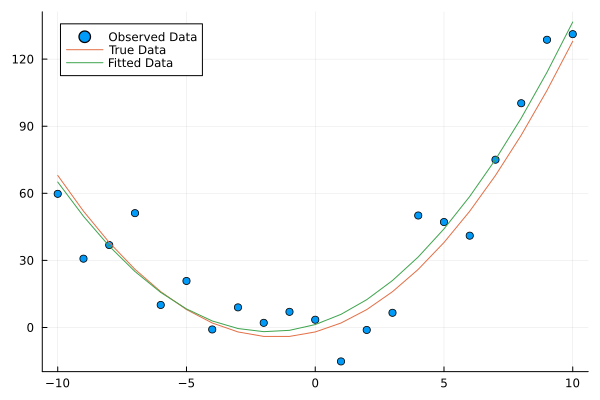

In [29]:
# 1.
using Plots
scatter(x,y_observed, label="Observed Data")

# 2.
plot!(x,y_true, label="True Data")

# 3.
using Polynomials: Polynomial, fit, coeffs
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1].+ fit_coeff[2].*x .+ fit_coeff[3].* x.^2
plot!(x,y_fitted, label="Fitted Data")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

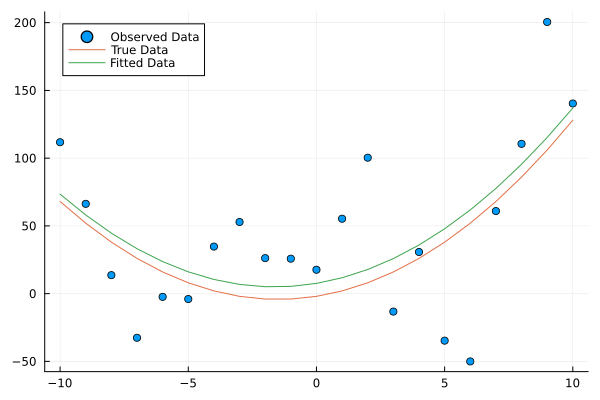

In [36]:
σ = 50
d = di.Normal(0,σ)

y_observed = y_true .+ rand(d, length(x))

scatter(x,y_observed, label="Observed Data")

plot!(x,y_true, label="True Data")

line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1].+ fit_coeff[2].*x .+ fit_coeff[3].* x.^2
plot!(x,y_fitted, label="Fitted Data")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit for 2.4 compared to 2.3 is not closer because the standard deviation is higher. When this occurs the spread of noise is much greater.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


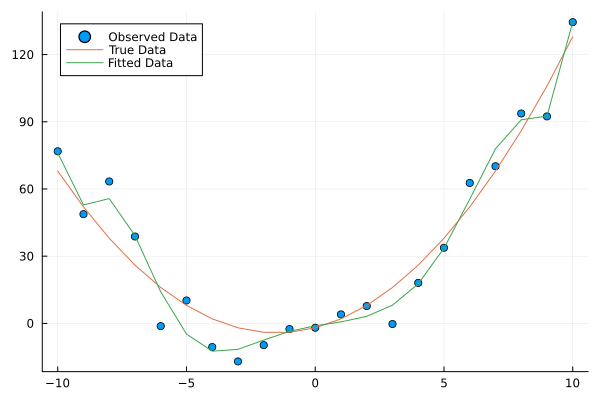

In [39]:
σ = 10
d = di.Normal(0,σ)

y_observed = y_true .+ rand(d, length(x))

scatter(x,y_observed, label="Observed Data")

plot!(x,y_true, label="True Data")

poly_fit = fit(x,y_observed,10)
fit_coeff = coeffs(poly_fit)
y_fitted = poly_fit.(x)
plot!(x,y_fitted, label="Fitted Data")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [40]:
# 1.
x_fit = -11:0.1:11

-11.0:0.1:11.0

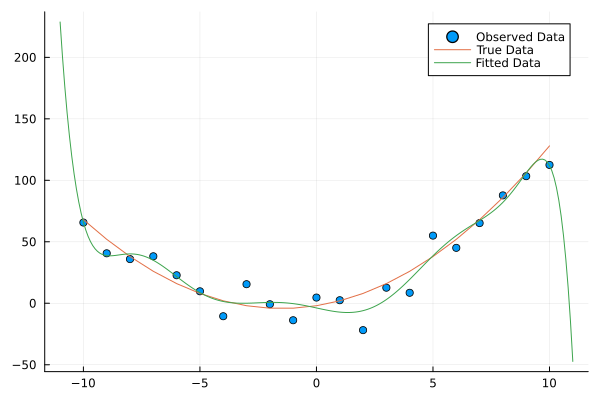

In [73]:
# 2. σ = 10 with 10th order polynomial fit
σ = 10
d = di.Normal(0,σ)

y_observed = y_true .+ rand(d, length(x))

scatter(x,y_observed, label="Observed Data")

plot!(x,y_true, label="True Data")

line_fit = fit(x,y_observed,10)
y_fitted = line_fit.(x_fit)
plot!(x_fit,y_fitted, label="Fitted Data")

3. What do you observe in the plot? What is this phenomenon called?

Overfitting, where each of the points are fit to the curve but the curve is not a good representation of the data.